In [1]:
import numpy as np
import pandas as pd 
import pylab as pl
from matplotlib import pyplot as plt #画图
from sklearn.cluster import KMeans 
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data/speed1.csv')
data.head()
print(list(data))
filtered_data = data[ (data['freScroll'] < 8) & (data['reading_duration'] < 3000)  & (data['numOfScroll'] < 500) & (data['reading_duration'] != 899)  & (data['displayedWords'] != 0) ]

print(filtered_data.shape)
filtered_data

['user_id', 'reading_session', 'article_id', 'scroll_range', 'max_offset', 'ratio', 'displayedWords', 'reading_duration', 'numberOfWords', 'numOfScroll', 'freScroll', 'reading_speed']
(417, 12)


,user_id,reading_session,article_id,scroll_range,max_offset,ratio,displayedWords,reading_duration,numberOfWords,numOfScroll,freScroll,reading_speed
2,1.0,08988275-1dab-44b9-82c1-a126c16465e3,36321394.0,9356.0,8246.0,0.8814,2281.0632,9.0,2588,19.0,2.111111,15207.088000
3,1.0,0b773369-8de5-45bd-974f-b048b844defa,36329818.0,6104.0,4994.0,0.8182,1706.7652,15.0,2086,65.0,4.333333,6827.060800
6,1.0,0b773369-8de5-45bd-974f-b048b844defa,36331448.0,2086.0,976.0,0.4679,601.2515,41.0,1285,254.0,6.195122,879.880244
10,1.0,11f347a2-2f9c-4c55-9fd1-bc25b05ee6ad,33649334.0,8086.0,6996.0,0.8652,1908.6312,99.0,2206,308.0,3.111111,1156.746182
13,1.0,143f973d-1385-4c29-a639-676c0457f8ba,34067609.0,2596.0,702.0,0.2704,403.9776,4.0,1494,25.0,6.250000,6059.664000
14,1.0,19bcab60-2516-4114-9e09-0bf34ee906c8,32402688.0,6730.0,5604.0,0.8327,1660.4038,27.0,1994,110.0,4.074074,3689.786222
15,1.0,1b2cd602-d184-401c-bc1e-887af034cc5d,34204542.0,3822.0,2732.0,0.7148,2020.0248,215.0,2826,485.0,2.255814,563.727851
19,1.0,1d1e4635-3ffd-44a5-a59e-787d64d1270a,36392084.0,19906.0,576.0,0.0289,54.3898,35.0,1882,36.0,1.028571,93.239657
20,1.0,1d1e4635-3ffd-44a5-a59e-787d64d1270a,36392084.0,20094.0,1915.0,0.0953,179.3546,35.0,1882,9.0,0.257143,307.465029
21,1.0,1d1e4635-3ffd-44a5-a59e-787d64d1270a,36392084.0,21804.0,2380.0,0.1092,205.5144,35.0,1882,11.0,0.314286,352.310400


In [56]:
data1 =  filtered_data[['displayedWords','numOfScroll']]
data1.head()
print(data1.shape)

data2 = filtered_data[['displayedWords','reading_duration']]
print(data2.shape)

data3 = filtered_data[['numOfScroll','reading_duration']]
print(data3.shape)




(417, 2)
(417, 2)
(417, 2)


(413,)
(413,)


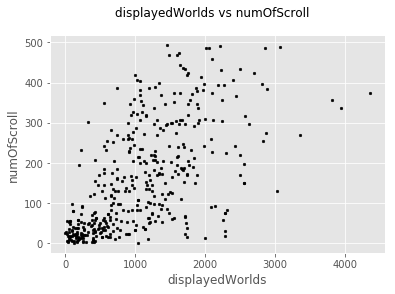

In [83]:
filtered_data1 = filtered_data[(filtered_data['displayedWords'] < 5000)]

x1 = filtered_data1['displayedWords'].values
print(x1.shape)
y1= filtered_data1['numOfScroll'].values
print(y1.shape)

plt.suptitle('displayedWorlds vs numOfScroll')
plt.xlabel('displayedWorlds')
plt.ylabel('numOfScroll')

sampleData1 = np.array(list(zip(x1,y1)))


plt.scatter(x1,y1, c='black', s=7)
#filter data 1.filtered() 2.sql 



(402,)
(402,)


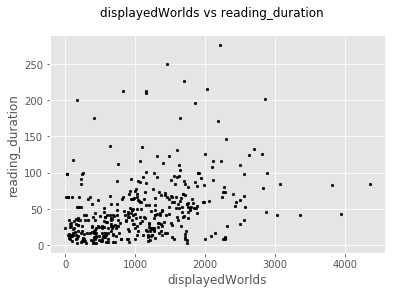

In [85]:
filtered_data2 = filtered_data[(filtered_data['reading_duration'] < 300) & (filtered_data['displayedWords'] < 5000)]


x2 = filtered_data2['displayedWords'].values
print(x2.shape)


y2= filtered_data2['reading_duration'].values
print(y2.shape)

plt.suptitle('displayedWorlds vs reading_duration')
plt.xlabel('displayedWorlds')
plt.ylabel('reading_duration')

sampleData2 = np.array(list(zip(x2,y2)))


plt.scatter(x2,y2, c='black', s=7)
#filter data 1.filtered() 2.sql 

(417,)
(417,)


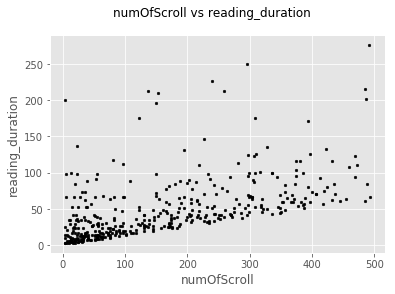

In [86]:
filtered_data3 = filtered_data[(filtered_data['reading_duration'] < 300) ]

x3 = filtered_data3['numOfScroll'].values
print(x.shape)
y3 = filtered_data3['reading_duration'].values
print(y.shape)

plt.suptitle('numOfScroll vs reading_duration')
plt.xlabel('numOfScroll')
plt.ylabel('reading_duration')

sampleData3 = np.array(list(zip(x3,y3)))


plt.scatter(x3,y3, c='black', s=7)
#filter data 1.filtered() 2.sql 

In [68]:
#num of clusters 
k = 3
kmeans = KMeans(n_clusters=k)

kmeans = kmeans.fit(sampleData1) #search in web
labels1 = kmeans.predict(sampleData1)
print(len(labels1))
print(len(sampleData1))
print(len(sampleData1))
centroids = kmeans.cluster_centers_
print(centroids) # five centres's coordiantion

#num of clusters 
k = 3
kmeans = KMeans(n_clusters=k)

kmeans = kmeans.fit(sampleData2) #search in web
labels2 = kmeans.predict(sampleData2)
print(len(labels2))
print(len(sampleData2))
print(len(sampleData2))
centroids = kmeans.cluster_centers_
print(centroids) # five centres's coordiantion

#num of clusters 
k = 3
kmeans = KMeans(n_clusters=k)

kmeans = kmeans.fit(sampleData3) #search in web
labels3 = kmeans.predict(sampleData3)
print(len(labels3))
print(len(sampleData3))
print(len(sampleData3))
centroids = kmeans.cluster_centers_
print(centroids) # five centres's coordiantion





417
417
417
[[1831.44699024  246.93292683]
 [ 595.59935181  105.02008032]
 [7203.1771      295.75      ]]
417
417
417
[[ 600.45093625   61.09163347]
 [1839.18740741   71.84567901]
 [7203.1771       42.25      ]]
417
417
417
[[  74.11877395   41.97318008]
 [ 313.93464052   79.96078431]
 [ 151.         1317.66666667]]


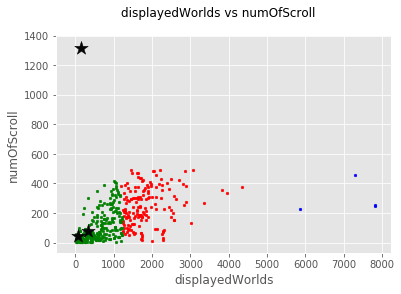

In [69]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

plt.suptitle('displayedWorlds vs numOfScroll')
plt.xlabel('displayedWorlds')
plt.ylabel('numOfScroll')
for i in range(k):
        points = np.array([sampleData1[j] for j in range(len(sampleData1)) if labels1[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505') #five centres drawn by makers 

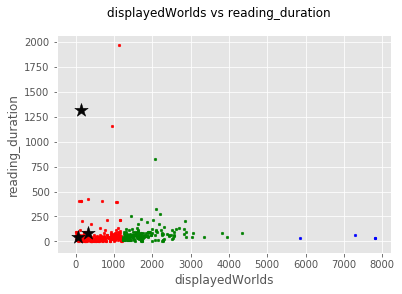

In [70]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

plt.suptitle('displayedWorlds vs reading_duration')
plt.xlabel('displayedWorlds')
plt.ylabel('reading_duration')
for i in range(k):
        points = np.array([sampleData2[j] for j in range(len(sampleData2)) if labels2[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505') #five centres drawn by makers 

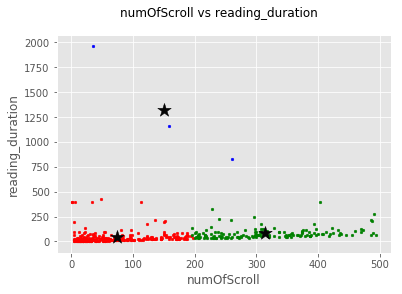

In [71]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
plt.suptitle('numOfScroll vs reading_duration')
plt.xlabel('numOfScroll')
plt.ylabel('reading_duration')
for i in range(k):
        points = np.array([sampleData3[j] for j in range(len(sampleData3)) if labels3[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505') #five centres drawn by makers 

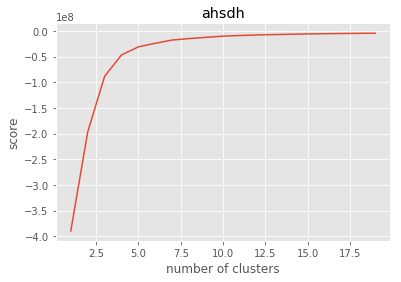

In [64]:
# 一个用来算最优 收敛的 算法 
Nc = range(1,20)
kmeans = [KMeans(n_clusters = i) for i in Nc] 
score = [kmeans[i].fit(sampleData1).score(sampleData1) for i in range(len(kmeans))]
pl.plot(Nc, score)
pl.xlabel('number of clusters')
pl.ylabel('score')
pl.title('ahsdh')
pl.show()

In [18]:
sampleData['label'] = labels

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices